<a href="https://colab.research.google.com/github/Pratichhya/ubs_course/blob/main/Bayesian_Flip_a_coin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  cm-super-minimal fonts-adf-accanthis fonts-adf-berenis fonts-adf-gillius
  fonts-adf-universalis fonts-cabin fonts-comfortaa fonts-croscore
  fonts-crosextra-caladea fonts-crosextra-carlito fonts-dejavu-core
  fonts-dejavu-extra fonts-droid-fallback fonts-ebgaramond
  fonts-ebgaramond-extra fonts-font-awesome fonts-freefont-otf
  fonts-freefont-ttf fonts-gfs-artemisia fonts-gfs-complutum fonts-gfs-didot
  fonts-gfs-neohellenic fonts-gfs-olga fonts-gfs-solomos fonts-go
  fonts-junicode fonts-lato fonts-linuxlibertine fonts-lmodern fonts-lobster
  fonts-lobstertwo fonts-noto-hinted fonts-noto-mono fonts-oflb-asana-math
  fonts-open-sans fonts-roboto-hinted fonts-sil-gentium
  fonts-sil-gentium-basic fonts-sil-gentiumplus fonts-sil-gentiumplus-compact
  fonts-stix fonts-texgyre ghostscript gsfonts javascript-common
  libcupsfilters1 libcups

# Bayesian Coin Flips

Lets say we flip a coin, and get $D$={$h$ heads and $t$ tails}, the probability follows a  <a href="https://en.wikipedia.org/wiki/Binomial_distribution" target="_blank">binomial distribution</a>
$$ P(D|\theta) = {\binom {t+h}{h}}\theta^{h}(1-\theta)^{t} $$
where ${\displaystyle {\binom {t+h}{h}}={\frac {t+h!}{h!t!}}}$
and $D$ is the event of getting $h$ heads and $t$ tails, $\theta$ is the probability of heads, and $1-\theta$ is the probability of tails. Let say we want to flip the conditional probability using Bayes' theorem:
  $$ P(\theta|D) = \dfrac{P(D|\theta)P(\theta)}{P(D)} $$
                                <p>
                                    <strong>Why do we want to write the conditional probability this way?</strong>
                                </p>
                                <p>The conditional probability, $P(\theta|D)$, treats the probability of heads, $\theta$, as a random variable. It is the probability of $\theta$, given that we observed the event $D$. To make speaking of these probabilies easier they are given names:</p>
                                <ul>
                                    <li>$P(\theta)$: the prior</li>
                                    <li>$P(\theta|D)$: the posterior</li>
                                    <li>$P(D|\theta)$: the likelihood</li>
                                </ul>
                                <p>For example, lets say we flipped some coins and observed $h=3$ heads and $t=5$ tails, ($D$ is the event of 3 heads and 5 tails), the posterior allows us to obtain the probabilities of $P(\theta=0.1|D)$ or $P(\theta=0.7|D)$, etc. The posterior givens us probabilities for all possible values of $\theta$ (the probability of heads).</p>

## Prior

 <p>
                                    Next, lets look at the prior,$ P(\theta)$, this is the probability of $\theta$ before any coin flips. In other words, this is the measure of the belief 
                                    <em>before</em>
                                     we perform the experiment. For the coin flipping example, we normally come across coins that have $\theta=0.5$, so our prior should center around 0.5. For now, lets pick a 
                                    <a href="https://en.wikipedia.org/wiki/Beta_distribution" target="_blank">beta distribution</a>
                                     with $\alpha=2$ and $\beta=2$ as our prior:
                                </p>
$$ P(\theta) = \dfrac{1}{B(\alpha,\beta)}\theta^{\alpha-1}(1-\theta)^{\beta-1} $$
                                <p>
                                    where $B(\alpha, \beta)$ is the 
                                    <a href="https://en.wikipedia.org/wiki/Beta_function" target="_blank">Beta Function</a>
                                    . This prior is centered at 0.5 and is lower for all other values. Let's graph the beta prior distribution:
                                </p>

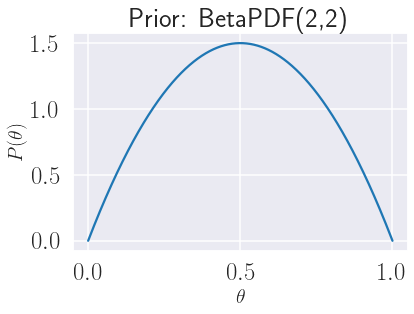

In [3]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# configure style
mpl.rc('text', usetex=True)
mpl.rc('font', size=26)
sns.set_style("darkgrid")
sns.set_context("talk", rc={"figure.figsize": (12, 8)}, font_scale=1.5)
current_palette = sns.color_palette()

#defining prior
def plot_prior(alpha, beta, ax=None):
    x = np.linspace(0, 1, 1000)
    y = scipy.stats.beta.pdf(x, alpha, beta)
    if not ax:
        fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_xlabel(r"$\theta$", fontsize=20)
    ax.set_ylabel(r"$P(\theta)$", fontsize=20)
    ax.set_title("Prior: BetaPDF({},{})".format(alpha,beta));
    
plot_prior(alpha=2, beta=2)

The maximum of our prior is centered at 0.5 and is lower for other values. This means that we normally see coins which are fair, but do not rule out that there is a chance that the coin could be unfair.

## Evidence / Marginal Likelihood $P(D)$

 <p>The last thing we need to get the posterior is the denominator of bayes theorem, $P(D)$, which is the probability of the event happening. In general, this is calculated by integrating over all the possible values of $\theta$:</p>
                                 $$ P(D) = \int_0^1 P(D|\theta)P(\theta)d\theta $$
                                <p>Normally this integral would not be possible to do analytically, but since our prior is a beta distribution and our likelihood is a binomial distribution, this integral would be worked out to be:</p>
                                 $$ P(D) = {\binom {t+h}{h}}\dfrac{B(h+\alpha, t+\beta)}{B(\alpha, \beta)} $$
                                <p>For other priors, the integral would not be able to be computed, and other techniques are used to get the posterior, which I will get into in a future blog post.</p>

## Putting everything together to obtain the posterior distribution

 <p>Putting $P(D)$, the prior $P(\theta)$, and likelihood $P(D|\theta)$ together into Bayes' theorem to get the posterior: $$ P(\theta|D) = \dfrac{1}{B(h+\alpha, t+\beta)}\theta^{h+\alpha-1}(1-\theta)^{t+\beta-1} $$</p>
 which is nothing but a beta distribution with parameters $h+\alpha$ and $t+\beta$. 
  <p>Let's say create function in python to plot the posterior:</p>

In [5]:
def plot_posterior(heads, tails, alpha, beta, ax=None):
    x = np.linspace(0, 1, 1000)
    y = scipy.stats.beta.pdf(x, heads+alpha, tails+beta)
        
    if not ax:
        fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_xlabel(r"$\theta$", fontsize=20)
    ax.set_ylabel(r"$P(\theta|D)$", fontsize=20)
    ax.set_title("Posterior after {} heads, {} tails, \
                 Prior: BetaPDF({},{})".format(heads, tails, alpha, beta));


## Numerical Example

 <p>Recall, for our example, $\alpha=2$ and $\beta=2$, thus posterior becomes:</p>
                                 $$ P(\theta|D) = \dfrac{1}{B(h+2, t+2)}\theta^{h+1}(1-\theta)^{t+1} $$
                                 <p>Lets say we flipped the coin 17 times and observed 5 heads and 12 tails, our posterior becomes:</p>
                               

 <p>With 5 heads and 12 tails, our belief of the possible values of $\theta$ shifts to the left, suggesting that $\theta$ is more likely to be lower than $0.5$. Now lets say we flipped 75 times and observed 50 heads and 25 tails:</p>

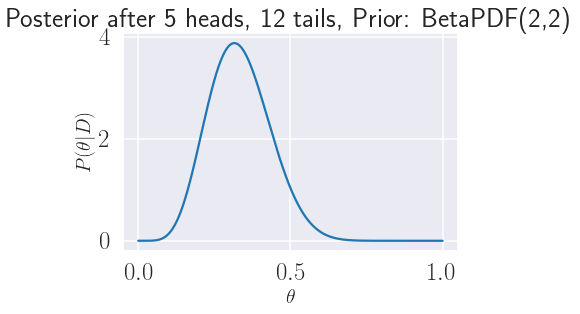

In [6]:
plot_posterior(heads=5, tails=12, alpha=2, beta=2)

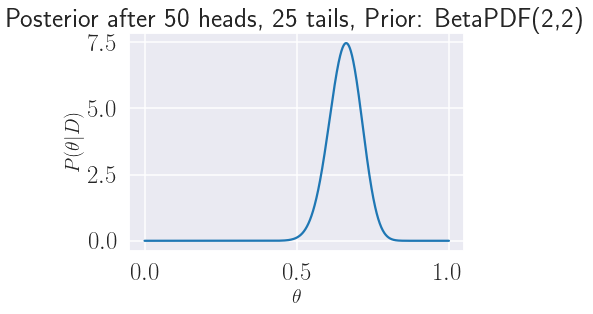

In [ ]:
plot_posterior(heads=50, tails=25, alpha=2, beta=2)

 <p>With that many heads, the posterior shifts to the right, implying that $\theta$ is higher. Notice that the distrubution for 75 flips is narrower than the 17 times. With 75 flips, we have a clearer picture of what the value of $\theta$ should be.</p>

## Different Priors
 <p>
                                    <strong>What would happen when we choose other priors?</strong>
                                </p>
                                <p>We'll explore how to handle non-beta priors in a future blog post. Right now, lets look at what happens when we choose different beta priors. Lets say we come from a world where coins are not 50-50, but are biased toward a bigger 
                                $\theta$ 
                                (i.e. higher probability to get an head):</p>

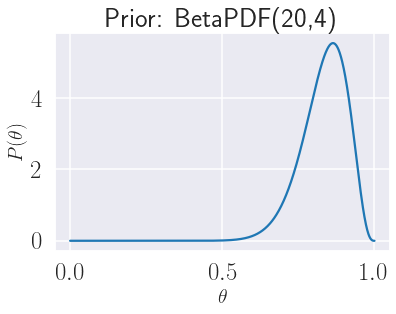

In [ ]:
plot_prior(alpha=20, beta=4)

 <p>Let's see what happens to the posterior when we flip a coin and get:</p>
                                <ul>
                                    <li>4 heads 5 tails</li>
                                    <li>20 heads 20 tails</li>
                                    <li>50 heads 49 tails</li>
                                    <li>75 heads 74 tails</li>
                                    <li>400 heads 399 tails</li>
                                </ul>

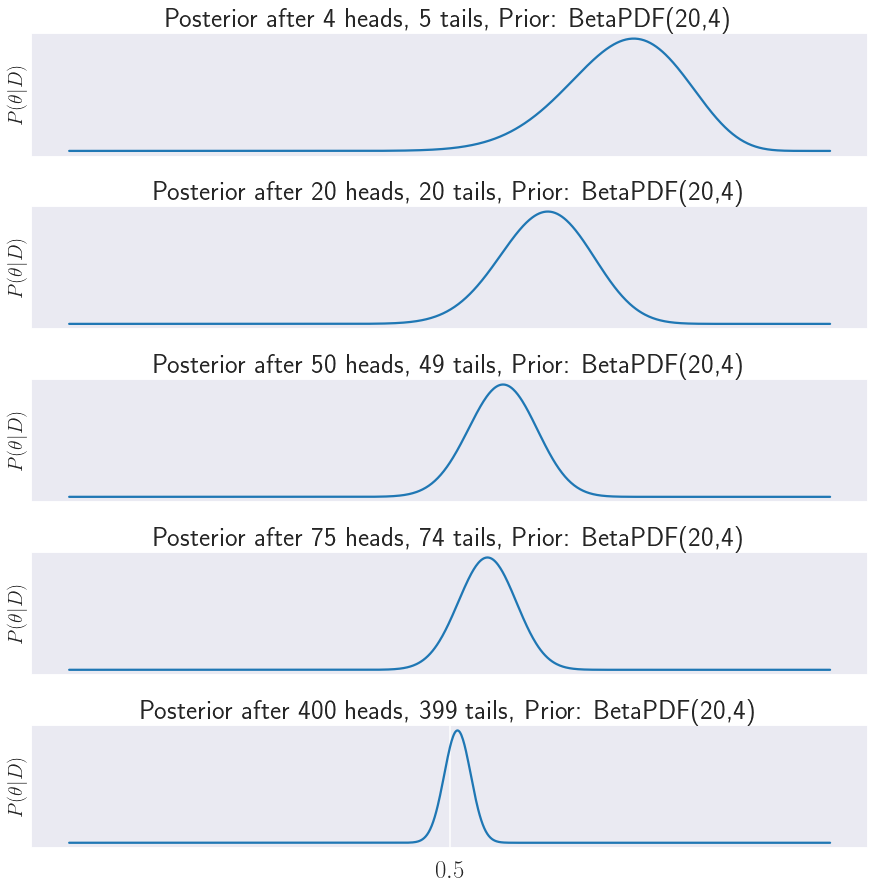

In [ ]:
fig, axes = plt.subplots(5,figsize=(15,15))
flips = [(4, 5), (20, 20), (50, 49), (75, 74), (400, 399)]
for i, flip in enumerate(flips):
    plot_posterior(heads=flip[0], tails=flip[1], alpha=20, beta=4, ax=axes[i])
    axes[i].set_yticks([])
fig.subplots_adjust(hspace=0.4)
for ax in axes:
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_xlabel("")
axes[4].set_xticks([0.5]);

<span style='font-weight:bold;color:red'> -------------------------- <br/>
    Question 1 - Comment these results.<br/> -------------------------- </span> 

So here, when checking the probability of getting head given the several condition, we see that the probibility distribution curve is biased to higher probability of getting head though lesser or equal number of head and tail is used. The reason  is noticed that in the entire case, the value of alpha in beta function that is related to getting head is very much higher than that of beta to getting tail.

When increasing the number of flips, though the curve is shifting towards more likeable value but still even after increasing the flips to 400 heads and 399 tails it is not able to reach to the peak of 0.5. 



<span style='font-weight:bold;color:red'> -------------------------- <br/>
    Question 2 - Compare the posterior distribution obtained after observing 
$h=1$ and $t=0$ by using:  </span> 
    <ul>
       <span style='font-weight:bold;color:red'> <li> a uniform prior distribution (equivalent to Beta distribution  with $\alpha=\beta=1$)</li>
        <li>the previous Beta distribution  with $\alpha=\beta=2$ </li></span>
    </ul>
   <span style='font-weight:bold;color:red'> Comment the results.<br/> -------------------------- </span> 



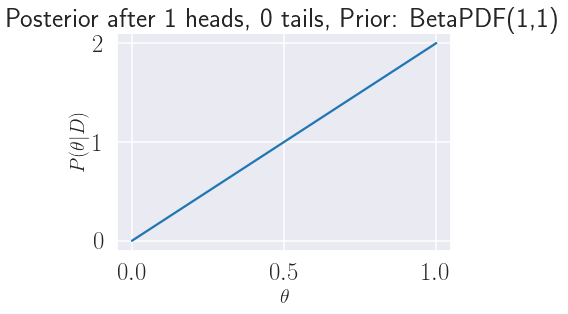

In [ ]:
plot_posterior(heads=1, tails=0, alpha=1, beta=1)

Since $$ P(\theta|D)  \ \propto \theta^{h+\alpha-1}(1-\theta)^{t+\beta-1} $$
we see that when $$\theta =0;$$ $$ P(\theta|D) = 0$$
lly, 
$$\theta=1 ;$$  $$P(\theta|D) = infinity$$

Thus we obtain a straight line when (heads=1, tails=0, alpha=1, beta=1)

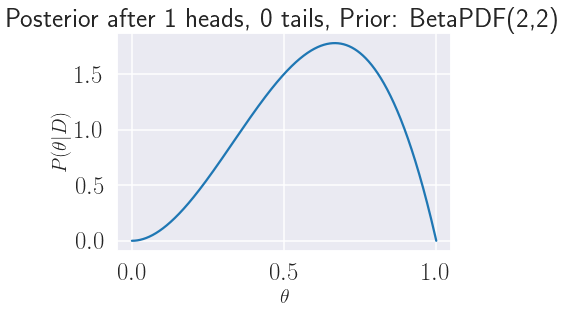

In [7]:
plot_posterior(heads=1, tails=0, alpha=2, beta=2)

In this case of calculating posterior with heads=1, tails=0, alpha=2, beta=2, we see that there is no bias and is fair chance to get head and tail. But since the prior probability of getting head is 1 where as for tail is 0, so, the probability of getting head given the conditions i.e., posterior is higher than 0.5.

<span style='color:gray;float:right'>----
    *François Septier - Copernicus Master in Digital Earth*</span>